In [ ]:
#fait par AQADDAR Marieme AMMOR Doha ACHQIR Khadija
#pour importer les packages
import numpy as np
import io
import pandas as pd
#pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#pour la question des contenus similaires
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#ouvrir la base de données
#df pour dataframe nom de base données
#pd pour pandas et fonction read pour lire le fichier de databse de type csv
#et le chemin de la database entre parentheses
from google.colab  import files
uploaded = files.upload()


Saving amazon.csv to amazon.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['amazon.csv']))
print(df)

      product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹39

In [ ]:
#informations par rapport aux colonnes
df.info()
#pour object il faut modifier pour faire des calculs puisque c'est pas numerique

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
#pour les variables numeriques
df.describe()

product_id                                       product_name  \
count         1465                                               1465   
unique        1351                                               1337   
top     B07JW9H4J1  Fire-Boltt Ninja Call Pro Plus 1.83" Smart Wat...   
freq             3                                                  5   

                                                 category discounted_price  \
count                                                1465             1465   
unique                                                211              550   
top     Computers&Accessories|Accessories&Peripherals|...             ₹199   
freq                                                  233               53   

       actual_price discount_percentage rating rating_count  \
count          1465                1465   1465         1463   
unique          449                  92     28         1143   
top            ₹999                 50%    4.1        9,378   
freq            120                  56    244            9   

                                            about_product  \
count                                                1465   
unique                                               1293   
top     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
freq                                                    6   

                                                  user_id  \
count                                                1465   
unique                                               1194   
top     AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
freq                                                   10   

                                                user_name  \
count                                                1465   
unique                                               1194   
top     $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
freq                                                   10   

                                                review_id  \
count                                                1465   
unique                                               1194   
top     R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
freq                                                   10   

                                             review_title  \
count                                                1465   
unique                                               1194   
top     Worked on iPhone 7 and didn’t work on XR,Good ...   
freq                                                   10   

                                           review_content  \
count                                                1465   
unique                                               1212   
top     I am not big on camera usage, personally. I wa...   
freq                                                    8   

                                                 img_link  \
count                                                1465   
unique                                               1412   
top     https://m.media-amazon.com/images/I/413sCRKobN...   
freq                                                    3   

                                             product_link  
count                                                1465  
unique                                               1465  
top     https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...  
freq                                                    1

nettoyage de données

In [ ]:
#pour savoir si on a des lignes repetées on utilise la fct duplicated
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1460    False
1461    False
1462    False
1463    False
1464    False
Length: 1465, dtype: bool

In [ ]:
#pour savoir si on a des lignes repetées on utilise la fct duplicated et sum pour la somme
df.duplicated().sum()

0

In [ ]:
#pour supprimer les lignes repetées si jamais
#inplace=True pour que ce soit modifier dans la database aussi
df.drop_duplicates(inplace=True)

In [ ]:
#pour decouvrire les valeurs manquantes
#is null est une fonction de pandas
df.isnull().sum()
#ici par exemple on a 2082 films sans directeurs
#ou encore 337 films sans ratings

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [ ]:
#pour afficher les titres des colonnes
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

Analyse exploratoire


In [ ]:
#pour valeurs numeriques
#moyenne d'une colonne par exemple la colonne release year parce que c'est elle qu'est en numerique
df['review_content'].mean()

TypeError: ignored

In [ ]:
#pour savoir combien de films on a pour chaque type
#ici on remarque que on a que deux types qui sont Movie et TV Show
df['type'].value_counts()

Movie      7814
TV Show    1854
Name: type, dtype: int64

In [ ]:
#meme chose pour country on veut savoir combien de films a ete realise dans quel pays
df['country'].value_counts()

United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: country, Length: 86, dtype: int64

<Axes: ylabel='Frequency'>

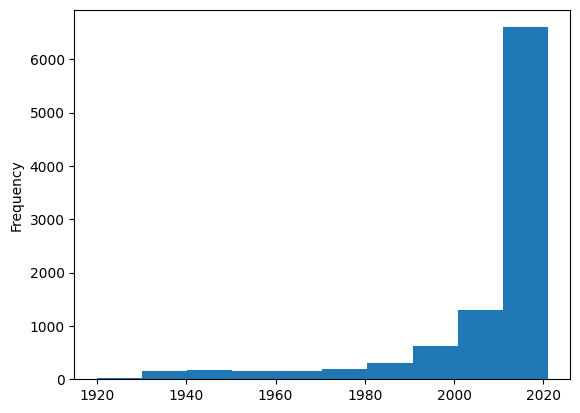

In [ ]:
df['release_year'].plot(kind='hist')

In [ ]:
#pour compter le nombre d'occurrences de chaque réalisateur
directors_count = df["director"].value_counts()

#et ici l'affichage des 5 premiers réalisateurs les plus populaires
top_directors = directors_count.head(5)
print(top_directors)

Mark Knight              113
Cannis Holder             61
Moonbug Entertainment     37
Jay Chapman               34
Arthur van Merwijk        30
Name: director, dtype: int64


In [ ]:
#pour compter le nombre d'occurrences de chaque categorie
categories_count = df["listed_in"].value_counts()

#afficher les 5 premiers categories les plus populaires
top_categories = categories_count.head(5)
print(top_categories)

Drama              986
Comedy             536
Drama, Suspense    399
Comedy, Drama      377
Animation, Kids    356
Name: listed_in, dtype: int64


In [ ]:
#compter le nombre d'occurrences de chaque acteur
actors_count = df["cast"].str.split(",", expand=True).stack().str.strip().value_counts()

#afficher les 10 premiers acteurs les plus populaires
top_actors = actors_count.head(10)
print(top_actors)


Maggie Binkley        56
1                     35
Gene Autry            32
Nassar                30
Champion              29
Anne-Marie Newland    25
Prakash Raj           24
Roy Rogers            23
John Wayne            23
Danny Trejo           22
dtype: int64


In [ ]:
#extraire les séries TV du DataFrame
tv_shows = df[df["type"] == "TV Show"]

#trier les séries TV par nombre de saisons
tv_shows_sorted = tv_shows.sort_values("duration", ascending=False)

#afficher les cinq séries TV avec le plus grand nombre de saisons
top_5_tv_shows = tv_shows_sorted.head(5)
print("Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :")
print(top_5_tv_shows[["show_id","title", "duration"]])

Les cinq meilleures séries télévisées avec le plus grand nombre de saisons :
     show_id         title   duration
800     s801     Teen Wolf  9 Seasons
185     s186       Vikings  9 Seasons
1081   s1082        Scrubs  9 Seasons
3571   s3572  'Allo 'Allo!  9 Seasons
867     s868         Suits  9 Seasons


In [ ]:
#créer un vecteur de caractéristiques pour les descriptions des contenus
vectorizer = CountVectorizer(stop_words='english')
features = vectorizer.fit_transform(df['description'].fillna(''))

#calculer la similarité cosinus entre chaque paire de contenus
cosine_sim = cosine_similarity(features)

#trouver les contenus similaires à "The Marvelous Mrs. Maisel"
title = "Maradona: Blessed Dream"
index = df[df['title'] == title].index[0]
similar_content = list(enumerate(cosine_sim[index]))
sorted_similar_content = sorted(similar_content,key=lambda x:x[1],reverse=True)[1:10]

#afficher les contenus similaires
print("Contenus similaires à ", title)
for content in sorted_similar_content:
    print(df.iloc[content[0]]['title'])

Contenus similaires à  Maradona: Blessed Dream
Top Five
The Father
Peter Allen: Not The Boy Next Door
Come On Get Happy: The Partridge Family Story
Pazhagiya Naatkal
A Mind Of Her Own
Nat Turner: A Troublesome Property
Wonder Boy for President
Tattoo Nation


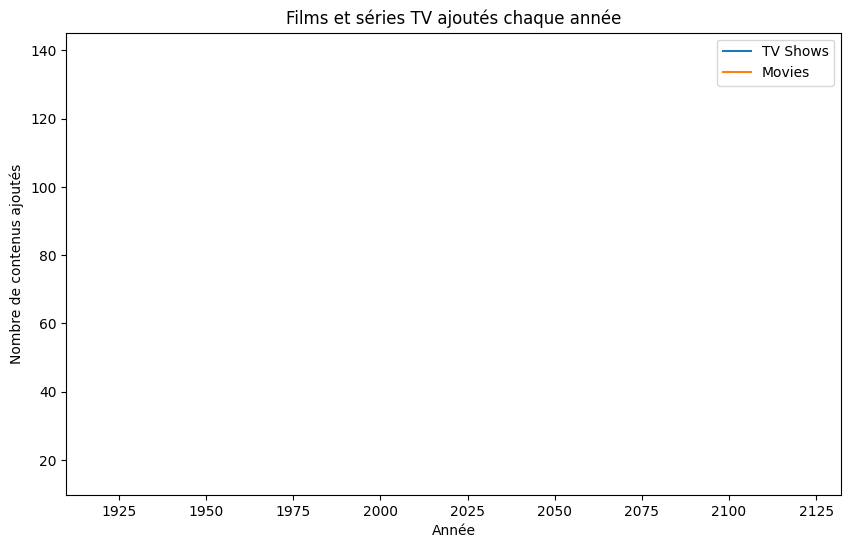

In [ ]:
#comparer le nombre de films et de séries TV ajoutés chaque année
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
tv_shows_added = df[df["type"] == "TV Show"].groupby('year_added').size()
movies_added = df[df["type"] == "Movie"].groupby('year_added').size()

#tracer un graphique pour comparer le nombre de films et de séries TV ajoutés chaque année
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tv_shows_added.index, tv_shows_added.values, label='TV Shows')
ax.plot(movies_added.index, movies_added.values, label='Movies')
ax.set_title('Films et séries TV ajoutés chaque année')
ax.set_xlabel('Année')
ax.set_ylabel('Nombre de contenus ajoutés')
ax.legend()
plt.show()

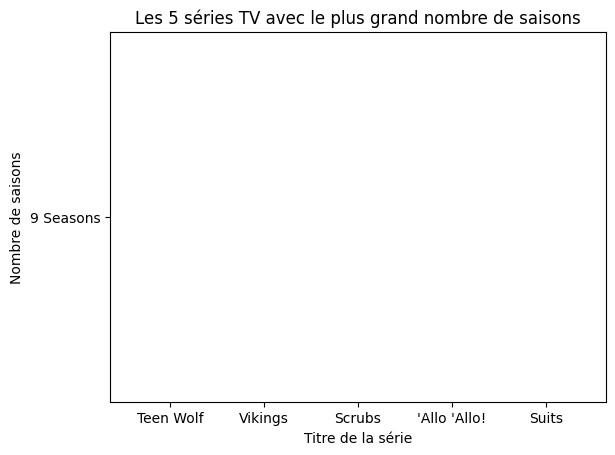

In [ ]:
#sélectionner les données pour les séries TV uniquement
tv_shows = df[df["type"] == "TV Show"]

#trier les séries TV par nombre de saisons décroissant
sorted_tv_shows = tv_shows.sort_values("duration", ascending=False)

#extraire les 5 séries TV avec le plus grand nombre de saisons
top_tv_shows = sorted_tv_shows.head(5)

#afficher un diagramme à barres pour les 5 séries TV avec le plus grand nombre de saisons
plt.bar(top_tv_shows["title"], top_tv_shows["duration"])
plt.title("Les 5 séries TV avec le plus grand nombre de saisons")
plt.xlabel("Titre de la série")
plt.ylabel("Nombre de saisons")
plt.show()

show_id     type                    title         director  \
0         s1    Movie      The Grand Seduction     Don McKellar   
1         s2    Movie     Take Care Good Night     Girish Joshi   
2         s3    Movie     Secrets of Deception      Josh Webber   
3         s4    Movie       Pink: Staying True   Sonia Anderson   
4         s5    Movie            Monster Maker     Giles Foster   
...      ...      ...                      ...              ...   
9663   s9664    Movie      Pride Of The Bowery  Joseph H. Lewis   
9664   s9665  TV Show            Planet Patrol              NaN   
9665   s9666    Movie                  Outpost     Steve Barker   
9666   s9667  TV Show  Maradona: Blessed Dream              NaN   
9667   s9668    Movie              Harry Brown    Daniel Barber   

                                                   cast         country  \
0        Brendan Gleeson, Taylor Kitsch, Gordon Pinsent          Canada   
1      Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar           India   
2     Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...   United States   
3     Interviews with: Pink, Adele, Beyoncé, Britney...   United States   
4     Harry Dean Stanton, Kieran O'Brien, George Cos...  United Kingdom   
...                                                 ...             ...   
9663                           Leo Gorcey, Bobby Jordan             NaN   
9664  DICK VOSBURGH, RONNIE STEVENS, LIBBY MORRIS, M...             NaN   
9665  Ray Stevenson, Julian Wadham, Richard Brake, M...             NaN   
9666  Esteban Recagno, Ezequiel Stremiz, Luciano Vit...             NaN   
9667  Michael Caine, Emily Mortimer, Joseph Gilgun, ...             NaN   

          date_added  release_year rating   duration                listed_in  \
0     March 30, 2021          2014    NaN    113 min            Comedy, Drama   
1     March 30, 2021          2018    13+    110 min     Drama, International   
2     March 30, 2021          2017    NaN     74 min  Action, Drama, Suspense   
3     March 30, 2021          2014    NaN     69 min              Documentary   
4     March 30, 2021          1989    NaN     45 min           Drama, Fantasy   
...              ...           ...    ...        ...                      ...   
9663             NaN          1940     7+     60 min                   Comedy   
9664             NaN          2018    13+  4 Seasons                 TV Shows   
9665             NaN          2008      R     90 min                   Action   
9666             NaN          2021  TV-MA   1 Season            Drama, Sports   
9667             NaN          2010      R    103 min  Action, Drama, Suspense   

                                            description  year_added  
0     A small fishing village must procure a local d...      2021.0  
1     A Metro Family decides to fight a Cyber Crimin...      2021.0  
2     After a man discovers his wife is cheating on ...      2021.0  
3     Pink breaks the mold once again, bringing her ...      2021.0  
4     Teenage Matt Banting wants to work with a famo...      2021.0  
...                                                 ...         ...  
9663  New York City street principles get an East Si...         NaN  
9664  This is Earth, 2100AD - and these are the adve...         NaN  
9665  In war-torn Eastern Europe, a world-weary grou...         NaN  
9666  The series tells the story of Diego Maradona, ...         NaN  
9667  Harry Brown, starring two-time Academy Award w...         NaN  

[9668 rows x 13 columns]